# Mall Customers K-Means Clustering

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Load the Dataset

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Analysis

In [5]:
# Data Quality Report

# Distribution of the Gender column
gender_dist = df['Gender'].value_counts()


# Missing values for all columns
missing_values = df.isnull().sum()

# Cardinality, mode, and median for Age
age_cardinality = df['Age'].nunique()
age_mode = df['Age'].mode()[0]
age_median = df['Age'].median()

# Statistics for Annual Income (k$) and Spending Score (1-100)
stats = df[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the report
print("Gender Distribution:\n", gender_dist, "\n")
print("Missing Values:\n", missing_values, "\n")
print(f"Age - Cardinality: {age_cardinality}, Mode: {age_mode}, Median: {age_median}\n")
print("Statistics for Annual Income (k$) and Spending Score (1-100):\n", stats)

Gender Distribution:
 Gender
Female    112
Male       88
Name: count, dtype: int64 

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

Age - Cardinality: 51, Mode: 32, Median: 36.0

Statistics for Annual Income (k$) and Spending Score (1-100):
         Annual Income (k$)  Spending Score (1-100)
min              15.000000                1.000000
max             137.000000               99.000000
mean             60.560000               50.200000
median           61.500000               50.000000
std              26.264721               25.823522


## Visualize the Data

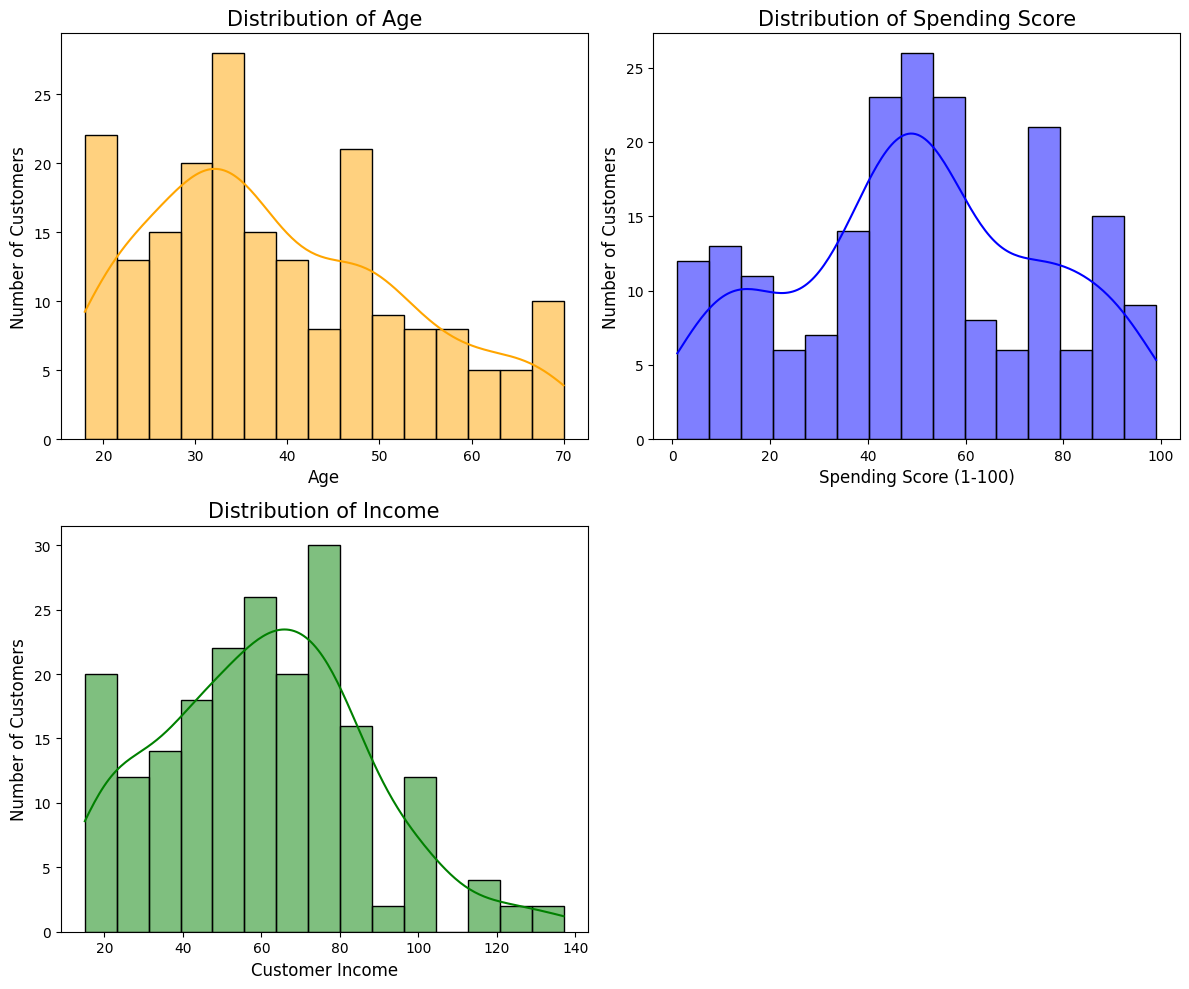

In [6]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

#Age distribution
sns.histplot(df['Age'], bins=15, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Distribution of Age", fontsize=15)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Number of Customers", fontsize=12)

#Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='blue', ax=axes[1])
axes[1].set_title("Distribution of Spending Score", fontsize=15)
axes[1].set_xlabel("Spending Score (1-100)", fontsize=12)
axes[1].set_ylabel("Number of Customers", fontsize=12)

#Annual Income distribution
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='green', ax=axes[2])
axes[2].set_title("Distribution of Income", fontsize=15)
axes[2].set_xlabel("Customer Income", fontsize=12)
axes[2].set_ylabel("Number of Customers", fontsize=12)

axes[3].axis('off')
plt.tight_layout()
plt.show()

### All three distributions are what we'd expect. The age distribution is skewed right (reflecting a younger demographic), the income distribution is skewed right (typical of income distributions), and the spending score distribution is roughly normal.

# Data Preparation

In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale the Annual Income and Spending Score columns
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### Create a new dataframe with only the selected features : 'Annual Income (k$)' and 'Spending Score (1-100)'

In [10]:
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.tail(5)

,Annual Income (k$),Spending Score (1-100)
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054
199,2.917671,1.273347


# K-Means Clustering

In [22]:
from sklearn.cluster import KMeans

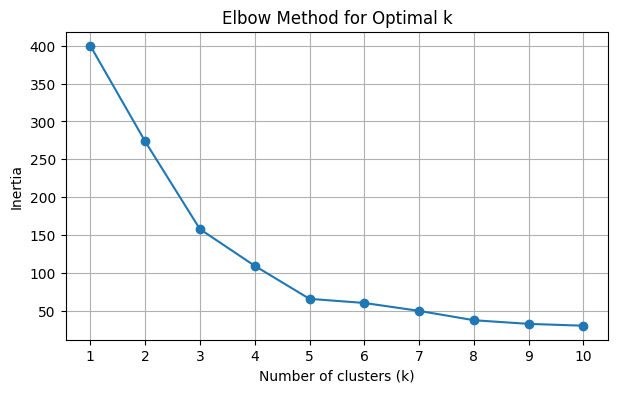

In [17]:
# Consider using the elbow method to find the optimal number of clusters
# Create a list to hold the inertia values
# define inertia as : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = []
# Loop over a range of cluster numbers
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#### The Elbow Method would suggest that the optimal number of clusters is 5.

#### Now we can use the Silhoutte Method to compare

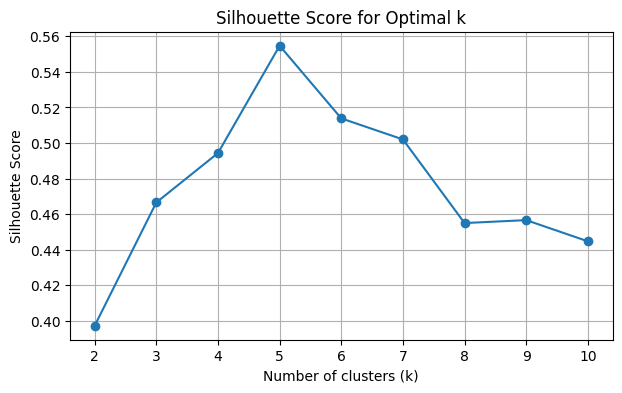

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
# Loop over a range of cluster numbers
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    score = silhouette_score(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

#### Silhoutte Score Method clearly shows us that the optimal k value is 5.

### 3C) Train the K-Means model using the optimal number of clusters

In [27]:
# Perform KMeans clustering
from sklearn.cluster import KMeans
# Create a KMeans instance with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)


KMeans(n_clusters=5, random_state=42)

### 3D) Obtain Cluster Labels

In [28]:
# Get the cluster labels
labels = kmeans.labels_
# Add the labels to the original dataframe
df_scaled['Cluster'] = labels   
df_scaled.tail(15)

,Annual Income (k$),Spending Score (1-100),Cluster
185,1.467233,1.816849,3
186,1.543572,-1.017125,1
187,1.543572,0.691024,3
188,1.619911,-1.288876,1
189,1.619911,1.350990,3
190,1.619911,-1.055946,1
191,1.619911,0.729845,3
192,2.001605,-1.638270,1
193,2.001605,1.583920,3
194,2.268791,-1.327697,1


### 4A) Visualize the Clusters

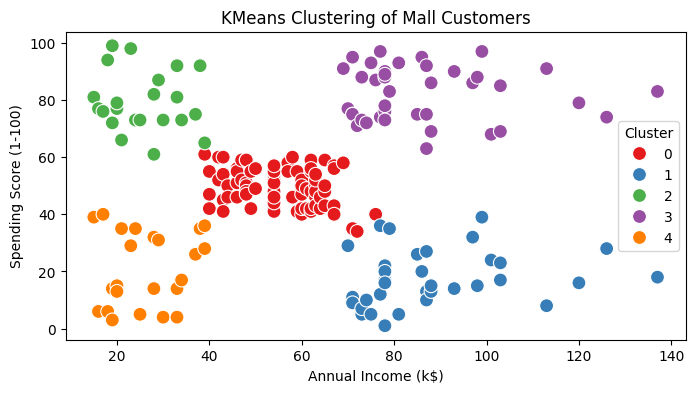

In [32]:
# Add the cluster labels back to the original data
df['Cluster'] = labels
df.head(10)
# Plot the clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('KMeans Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

### 4B) Analyze the Clusters
####

#### We can see that the clusters are for the most part well defined. The biggest thing that jumps out to me is that it looks like there are decision boundaries based on income. For instance, there are two clusters with annual income less than 40k (clusters number 2 and 4), there is one cluster with annual incomes roughly 40k to 70k (cluster #0), and there are two clusters with annual income above 70k (clusters #3 and #1). Now, let's talk about each cluster: 

- Cluster #0 is the most compact cluster, the annual income for this cluster range from about 40k to about 80k, but the spending scores of this cluster are only from about 40 to 60. 
- Cluster #1 is not a compact cluster, it contains the income outliers. The big takeaway from this cluster is that it contains all the high income individuals with low spending scores.
- Cluster #2 has balanced dispersion. It represents the individuals with low incomes and high spending scores.
- Cluster #3 is not compact and spread out just like Cluster #1. Again, this cluster also contains income outliers. This cluster represents the high income and high-spending-score individuals.
- Cluster #4 is also balanced. It represents individuals with a low income and a low spending score.


## 5. Report

### 5A. Dataset and Attribute Description

The dataset used for this analysis is `Mall_Customers.csv`, which contains information about mall customers. The key attributes in the dataset are:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (Male/Female).
- **Age**: Age of the customer.
- **Annual Income (k$)**: Annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature.

For the purpose of clustering, the analysis focused on the `Annual Income (k$)` and `Spending Score (1-100)` attributes. Exploratory data analysis revealed that both age and income distributions are right-skewed, while the spending score distribution is approximately normal.

### 5B. Data Preprocessing, Feature Selection, and Scaling

Data preprocessing steps included:

- **Data Quality Checks**: Assessed missing values and generated basic statistics for all columns.
- **Feature Selection**: Selected `Annual Income (k$)` and `Spending Score (1-100)` as the primary features for clustering, as these are most relevant for customer segmentation.
- **Scaling**: Applied `StandardScaler` to the selected features to standardize them. This ensures that both features contribute equally to the clustering process, preventing bias due to differing scales.

### 5C. Determining the Optimal Number of Clusters

To determine the optimal number of clusters (`k`), two methods were used:

- **Elbow Method**: Plotted the inertia (sum of squared distances to the nearest cluster center) for values of k from 1 to 10. The plot showed a clear "elbow" at k=5, suggesting this as the optimal number of clusters.
- **Silhouette Score**: Calculated the silhouette score for k values from 2 to 10. The silhouette score was maximized at k=5, confirming the result from the elbow method.

Both methods consistently indicated that 5 clusters best fit the data.

### 5D. Cluster Characteristics and Analysis

K-Means clustering was performed with k=5. The resulting clusters were visualized and analyzed as follows:

- **Cluster 0**: Customers with moderate annual income and moderate spending scores. This is a compact and well-defined cluster.
- **Cluster 1**: Customers with high annual income but low spending scores. This cluster contains income outliers and is less compact.
- **Cluster 2**: Customers with low annual income but high spending scores. This cluster has balanced dispersion.
- **Cluster 3**: Customers with high annual income and high spending scores. Like Cluster 1, it contains income outliers and is more spread out.
- **Cluster 4**: Customers with low annual income and low spending scores. This cluster is also balanced and well-defined.

The clusters are primarily separated by income and spending score, with clear boundaries observed in the visualizations.

### 5E. Insights and Recommendations

The clustering analysis reveals distinct customer segments based on income and spending behavior:

- **High-income, high-spending customers (Cluster 3)**: Target with premium offers and exclusive services.
- **High-income, low-spending customers (Cluster 1)**: Engage with personalized promotions to increase spending.
- **Low-income, high-spending customers (Cluster 2)**: Consider loyalty programs or value-based incentives.
- **Moderate and low-income, moderate/low-spending customers (Clusters 0 and 4)**: Tailor marketing strategies to encourage higher engagement.

Overall, **Annual Income** and **Spending Score** are effective features for customer segmentation in this context. The insights from this analysis can help the mall develop targeted marketing strategies for different customer groups.